

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Conestoga_College_logo.png" alt="Logo_Conestoga" width="400"/>


Artificial Intelligence for Business Decisions and Transformation 
&nbsp; 

CSCN8030 - Spring 2024 - Section 2
&nbsp; 

Professor: Glaucia Melo dos Santos, PhD
&nbsp;

Group 4 - Members:<br>

Krishna Kumar, Hemasree<br>
Shijin, Jency<br>
Fernandez, Arcadio<br>

## Sprint 2  Development:

# Project: ML-Driven Customer Segmentation for Brazilian eCommerce

# Part 2 - Geospatial Analysis of Brazilian E-Commerce


Brazilian E-Commerce Public Dataset by Olist (2016 to 2018)<br>

The reference code:<br>
ANDRE SIONEK<br>
https://www.kaggle.com/code/andresionek/geospatial-analysis-of-brazilian-e-commerce<br>

# 1. Data Preparation

## 1.1. Processing  Zip Codes in Brazil

In [23]:
import numpy as np
import pandas as pd 
import os

geo = pd.read_csv(r'Data\Brazilian_Ecommerce_dataset\\olist_geolocation_dataset.csv', dtype={'geolocation_zip_code_prefix': str})

# Gets the first three and four first digits of zip codes, we will explore this further to understand how zip codes works
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix'].str[0:1]
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix'].str[0:2]
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix'].str[0:3]
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix'].str[0:4]
geo.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_3_digits,geolocation_zip_code_prefix_4_digits
0,01037,-23.545621,-46.639292,sao paulo,SP,0,01,010,0103
1,01046,-23.546081,-46.644820,sao paulo,SP,0,01,010,0104
2,01046,-23.546129,-46.642951,sao paulo,SP,0,01,010,0104


There are 19.051 different zip_code_prefix. On average there are 52.6 coordinates for each prefix. But there is one prefix with 1.146 coordinates available.

In [24]:
geo['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

,count
count,19015.000000
mean,52.598633
std,72.057907
min,1.000000
25%,10.000000
50%,29.000000
75%,66.500000
max,1146.000000


There are some outliers coordinates in the dataset that are outside of brazilian territory. Lets guarantee that all coordinates are within a rectangle delimited by the limits of Brazil.

In [25]:
# Removing some outliers
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo = geo[geo.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo = geo[geo.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo = geo[geo.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo = geo[geo.geolocation_lng <=  -34.79314722]

In [26]:
from datashader.utils import lnglat_to_meters as webm
x, y = webm(geo.geolocation_lng, geo.geolocation_lat)
geo['x'] = pd.Series(x)
geo['y'] = pd.Series(y)

Then we treat the latitute and longitude coordinates and transform then to Mercator x/y Coordinates.

In [27]:
geo.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_3_digits,geolocation_zip_code_prefix_4_digits,x,y
0,01037,-23.545621,-46.639292,sao paulo,SP,0,01,010,0103,-5.191862e+06,-2.698137e+06
1,01046,-23.546081,-46.644820,sao paulo,SP,0,01,010,0104,-5.192478e+06,-2.698193e+06
2,01046,-23.546129,-46.642951,sao paulo,SP,0,01,010,0104,-5.192270e+06,-2.698199e+06


# 1.2. Plotting the Zip Codes in Brazil coordinates on a map

In [28]:
# transforming the prefixes to int for plotting purposes
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(int)
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix_1_digits'].astype(int)
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix_2_digits'].astype(int)
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix_3_digits'].astype(int)
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix_4_digits'].astype(int)

In [29]:
brazil = geo
agg_name = 'geolocation_zip_code_prefix'
brazil[agg_name].describe().to_frame()

,geolocation_zip_code_prefix
count,1.000121e+06
mean,3.657332e+04
std,3.054939e+04
min,1.001000e+03
25%,1.107500e+04
50%,2.653000e+04
75%,6.350400e+04
max,9.999000e+04


Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
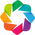

In [30]:
# plot wtih holoviews + datashader - bokeh with map background
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
hv.extension('bokeh')

%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)

T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img

In [31]:
plot_map(brazil, 'Zip Codes in Brazil', ds.min(agg_name), agg_name, cmap=rainbow)

BokehModel(combine_events=True, render_bundle={'docs_json': {'eabf4f3e-98e8-48af-affc-8c28192284a2': {'version…

Task exception was never retrieved
future: <Task finished name='Task-6' coro=<Callback.process_on_change() done, defined at c:\Users\hemas\Documents\Applied_AI_and_ML_Courses\Foundations_Of_ML\labs\CSCN8010\venv\CSCN8010_classic_ml3\Lib\site-packages\holoviews\plotting\bokeh\callbacks.py:356> exception=UnsetValueError("figure(id='p1385', ...).inner_height doesn't have a value set")>
Traceback (most recent call last):
  File "c:\Users\hemas\Documents\Applied_AI_and_ML_Courses\Foundations_Of_ML\labs\CSCN8010\venv\CSCN8010_classic_ml3\Lib\site-packages\holoviews\plotting\bokeh\callbacks.py", line 375, in process_on_change
    msg[attr] = self.resolve_attr_spec(path, cb_obj)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hemas\Documents\Applied_AI_and_ML_Courses\Foundations_Of_ML\labs\CSCN8010\venv\CSCN8010_classic_ml3\Lib\site-packages\holoviews\plotting\bokeh\callbacks.py", line 282, in resolve_attr_spec
    resolved = getattr(resolved, p, None)
               ^^^^

In [32]:
# plot wtih datashader - image with black background
import datashader as ds
from datashader import transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from IPython.core.display import HTML, display
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr

background = "black"
cm = partial(colormap_select, reverse=(background!="black"))
export = partial(export_image, background = background, export_path="export")
display(HTML("<style>.container { width:100% !important; }</style>"))
W = 700 

def create_map(data, cmap, data_agg, export_name='img'):
    pad = (data.x.max() - data.x.min())/50
    x_range, y_range = ((data.x.min() - pad, data.x.max() + pad), 
                             (data.y.min() - pad, data.y.max() + pad))

    ratio = (y_range[1] - y_range[0]) / (x_range[1] - x_range[0])

    plot_width  = int(W)
    plot_height = int(plot_width * ratio)
    if ratio > 1.5:
        plot_height = 550
        plot_width = int(plot_height / ratio)
        
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)

    agg = cvs.points(data, 'x', 'y', data_agg)
    img = tf.shade(agg, cmap=cmap, how='eq_hist')
    return export(img, export_name)

C:\Users\hemas\AppData\Local\Temp\ipykernel_34752\2869213612.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


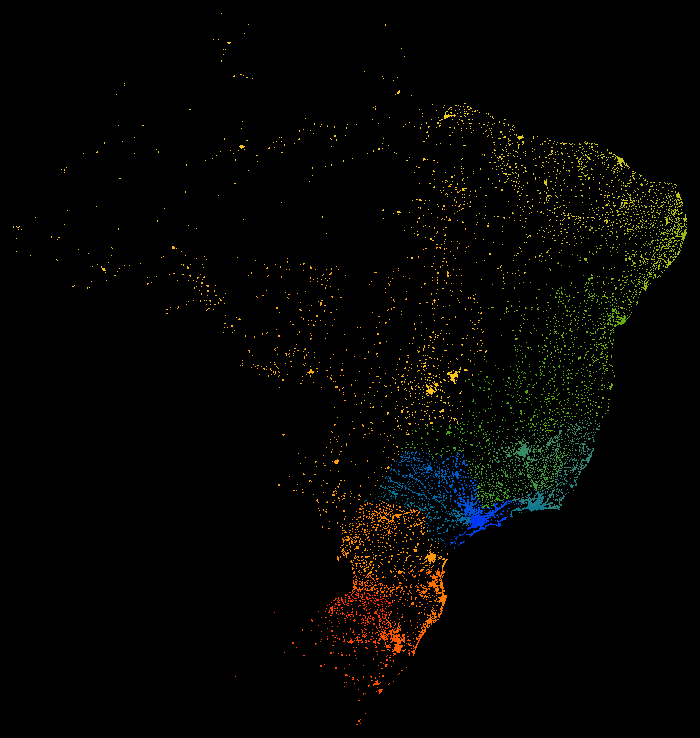

In [33]:
create_map(brazil, rainbow, ds.mean(agg_name),'brazil_zip_codes')

# 1.3. Zip Codes in States

Lets look at the state of Sao Paulo (SP) to see how zip code prefixes works in a regional level. We see that:
* zip code prefixes in Sao Paulo state ranges from 01001 to 19990
* zip codes starting with 0 are in the Sao Paulo metro region
* zip codes starting with 1 are in the interior of the state

In [34]:
def filter_data(level, name):
    df = geo[geo[level] == name]
    #remove outliers
    df = df[(df.x <= df.x.quantile(0.999)) & (df.x >= df.x.quantile(0.001))]
    df = df[(df.y <= df.y.quantile(0.999)) & (df.y >= df.y.quantile(0.001))]
    return df

In [35]:
sp = filter_data('geolocation_state', 'SP')
agg_name = 'geolocation_zip_code_prefix'
sp[agg_name].describe().to_frame()

,geolocation_zip_code_prefix
count,402651.000000
mean,9030.831782
std,5101.941134
min,1001.000000
25%,4661.000000
50%,8257.000000
75%,13330.000000
max,19990.000000


In [36]:
plot_map(sp, 'Zip Codes in Sao Paulo State', ds.min(agg_name), agg_name, cmap=rainbow)

BokehModel(combine_events=True, render_bundle={'docs_json': {'5c269a12-b6d2-4c0a-8b8e-521492218310': {'version…

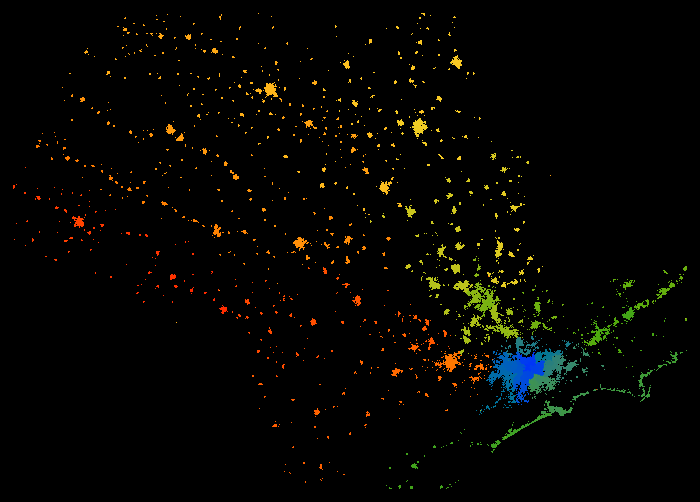

In [37]:
create_map(sp, rainbow, ds.mean(agg_name), 'sp_zip_codes')

# 2. Exploratory data analysis - EDA

## 2.1. Where does most revenue comes from?


Working with 5 digits of zip codes might lead us to very small samples in some areas, so we will work with 3 digits. Plotting the sum of products value grouped by zip code prefix we see that most of the revenue came from the Southeast and South regions of Brazil. It is also possible to see that large cities and capitals, where population is bigger, have larger participation on revenue. 

In [38]:
orders_df = pd.read_csv(r'Data\Brazilian_Ecommerce_dataset\\olist_orders_dataset.csv')

order_items = pd.read_csv(r'Data\Brazilian_Ecommerce_dataset\\olist_order_items_dataset.csv')

order_reviews = pd.read_csv(r'Data\Brazilian_Ecommerce_dataset\\olist_order_reviews_dataset.csv')

customer = pd.read_csv(r'Data\Brazilian_Ecommerce_dataset\\olist_customers_dataset.csv', dtype={'customer_zip_code_prefix': str})

# getting the first 3 digits of customer zipcode
customer['customer_zip_code_prefix_3_digits'] = customer['customer_zip_code_prefix'].str[0:3]
customer['customer_zip_code_prefix_3_digits'] = customer['customer_zip_code_prefix_3_digits'].astype(int)

brazil_geo = geo.set_index('geolocation_zip_code_prefix_3_digits').copy()

In [39]:
# merging the data
orders = orders_df.merge(order_items, on='order_id')
orders = orders.merge(customer, on='customer_id')
orders = orders.merge(order_reviews, on='order_id')

In [40]:
gp = orders.groupby('customer_zip_code_prefix_3_digits')['price'].sum().to_frame()
revenue = brazil_geo.join(gp)
agg_name = 'revenue'
revenue[agg_name] = revenue.price / 1000

In [41]:
plot_map(revenue, 'Orders Revenue (thousands R$)', ds.mean(agg_name), agg_name, cmap=fire)

BokehModel(combine_events=True, render_bundle={'docs_json': {'15748e2e-8b59-4b26-a6b5-03132f28d561': {'version…

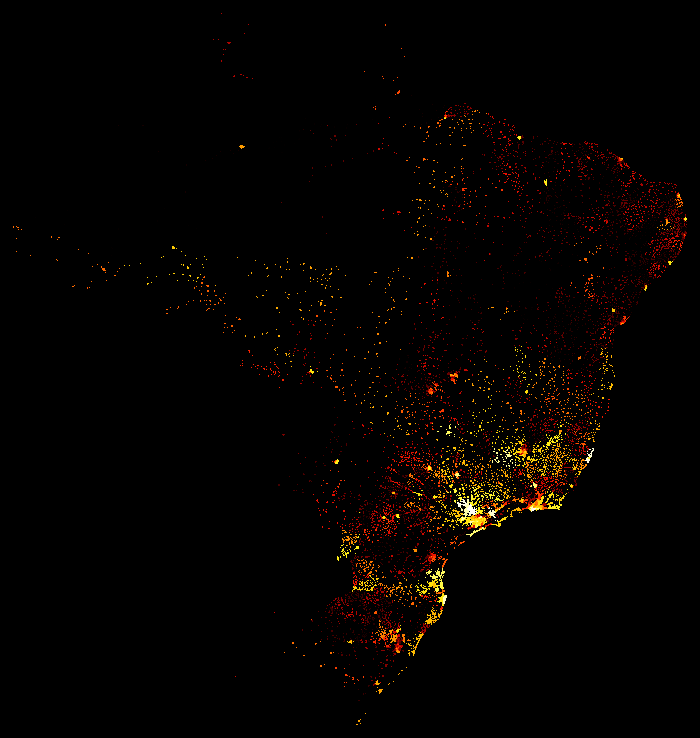

In [42]:
create_map(revenue, fire, ds.mean(agg_name), 'revenue_brazil')

# 2.2. What is the Average Ticket?


Here we see something somehow unexpected. Customers of the south and southeast regions of Brazil have lower average ticket, than their peers on north and norteast. This might happen because they have to pay more for freight (let's check that in a moment)

In [43]:
gp = orders.groupby('order_id').agg({'price': 'sum', 'customer_zip_code_prefix_3_digits': 'max'})
gp = gp.groupby('customer_zip_code_prefix_3_digits')['price'].mean().to_frame()
avg_ticket = brazil_geo.join(gp)
agg_name = 'avg_ticket'
avg_ticket[agg_name] = avg_ticket.price

In [44]:
plot_map(avg_ticket, 'Orders Average Ticket (R$)', ds.mean(agg_name), agg_name, cmap=bgy)

BokehModel(combine_events=True, render_bundle={'docs_json': {'63ebaa41-2358-4fce-8e1e-95f4ff094663': {'version…

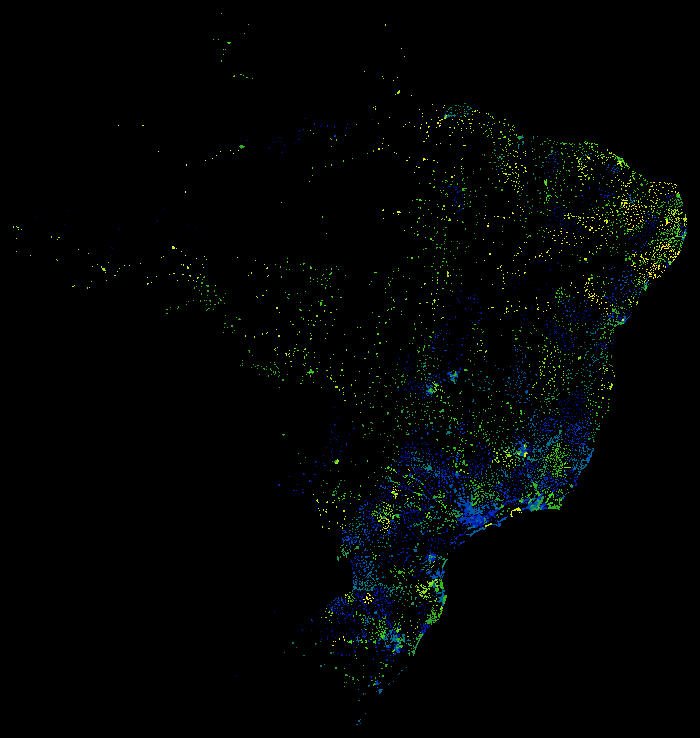

In [45]:
create_map(avg_ticket, bgy, ds.mean('avg_ticket'), 'avg_ticket_brazil')

## 2.3. Who pays more for transportation?


We might find a freight ratio by dividing the freight value by the order value. This ratio indicates the percentage of the product price that a person had to pay just to get their order delivered. For example, if a product costs R\$50.00 and the freight value was R\$10.00, then the freight ratio is 0.2 or 20%. Higher freight ratios are very likely to discourage customers to complete a purchase. Due to logistics costs, we expect to see lower freight ratios in densely populated areas and are higher freight ratios on sparsely poulated regions.

In [46]:
gp = orders.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum', 'customer_zip_code_prefix_3_digits': 'max'})
agg_name = 'freight_ratio'
gp[agg_name] = gp.freight_value / gp.price
gp = gp.groupby('customer_zip_code_prefix_3_digits')[agg_name].mean().to_frame()
freight_ratio = brazil_geo.join(gp)

In [47]:
plot_map(freight_ratio, 'Orders Average Freight Ratio', ds.mean(agg_name), agg_name, cmap=bgy)

BokehModel(combine_events=True, render_bundle={'docs_json': {'7c975b4e-d98e-4a85-89ac-4813c93cd50a': {'version…

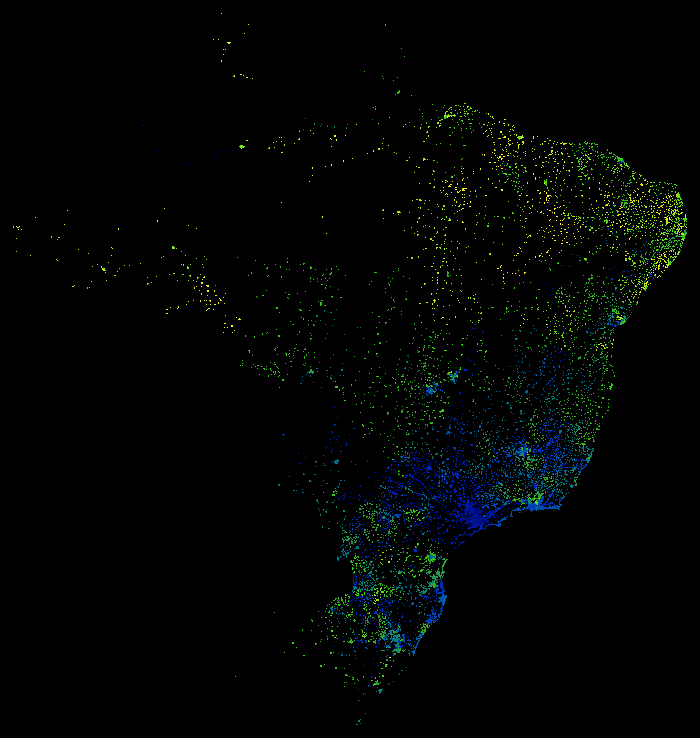

In [48]:
create_map(freight_ratio, bgy, ds.mean('freight_ratio'), 'freight_ratio_brazil')

## 2.4. Average Delivery Time


Unfortunately, those living in the north and northeast of Brazil have to bear higher delivery costs and wait longer to receive their purchase. 

In [49]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['actual_delivery_time'] = orders.order_delivered_customer_date - orders.order_delivered_carrier_date
orders['actual_delivery_time'] = orders['actual_delivery_time'].dt.days

In [67]:
orders['is_delayed'].value_counts()

is_delayed
False    103811
True       8561
Name: count, dtype: int64

In [68]:
display(orders)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_state,customer_zip_code_prefix_3_digits,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,actual_delivery_time,is_delayed
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,SP,31,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,6.0,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,BA,478,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,12.0,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,GO,752,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,9.0,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,RN,592,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,9.0,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,SP,91,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,SP,117,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,20.0,False
112368,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,BA,459,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,23.0,False
112369,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,286,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,13.0,False
112370,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,286,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,13.0,False


In [50]:
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()
delivery_time = brazil_geo.join(gp)
agg_name = 'avg_delivery_time'
delivery_time[agg_name] = delivery_time['actual_delivery_time']

In [51]:
plot_map(delivery_time, 'Orders Average Delivery Time (days)', ds.mean(agg_name), agg_name, cmap=bjy)

BokehModel(combine_events=True, render_bundle={'docs_json': {'bcd99139-e94c-4820-9ac2-5e6828e08d95': {'version…

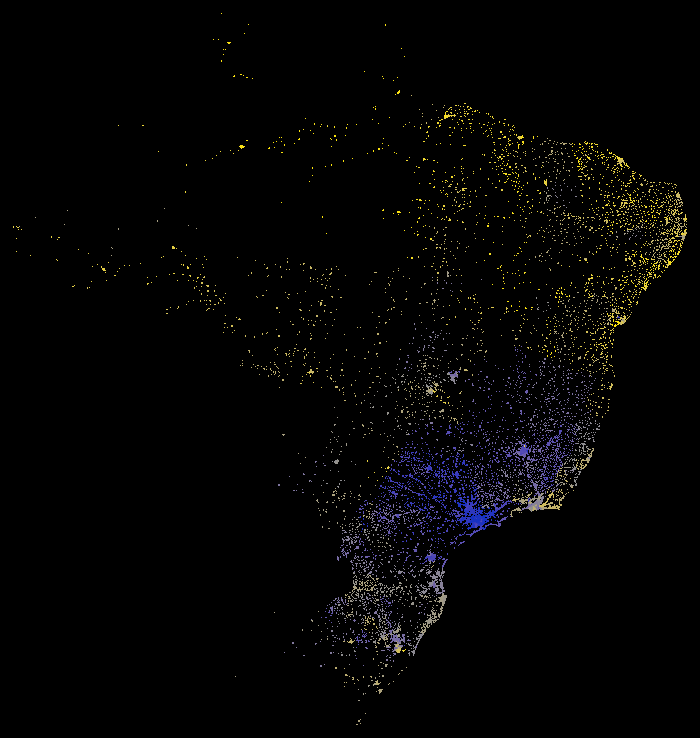

In [52]:
create_map(delivery_time, bjy, ds.mean(agg_name), 'avg_delivery_time_brazil')

## 2.4.1. Interesting Point About Brazilian Suburbs


Unlike other countries, in Brazil the richest areas usualy are near downtow and suburbs are know for poverty and high violence rates. Lets explore that in Rio the Janeiro.

In [53]:
riodejaneiro = filter_data('geolocation_city', 'rio de janeiro').set_index('geolocation_zip_code_prefix_3_digits')
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()
rj_delivery_time = riodejaneiro.join(gp)
rj_delivery_time[agg_name] = rj_delivery_time['actual_delivery_time']

In [54]:
plot_map(rj_delivery_time, 'Orders Average Delivery Time in Rio de Janeiro (days)', ds.mean(agg_name), agg_name, cmap=bjy)

BokehModel(combine_events=True, render_bundle={'docs_json': {'195f2f77-6fa8-42b7-a8f4-888884b84528': {'version…

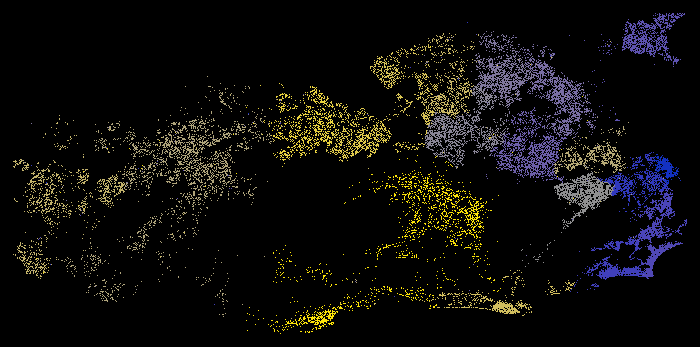

In [55]:
create_map(rj_delivery_time, bjy, ds.mean(agg_name), 'rio_de_janeiro_avg_delivery_time')

It turns out that if you live in rich neighborhoods such as Downtown, Botafogo, Copacabana and Flamengo you are likey to receive your order five days earlier than someone who lives in a poor neighborhood such as Cidade de Deus or Bangu. We see the same pattern in Sao Paulo and Porto Alegre, customers near downtown receive their orders faster than those who lives on suburbs.

## 2.5. Orders Average Review Score


Customers of Rio de Janeiro State and Northeast Region are more likely to give low scores on purchases. 

In [56]:
gp = orders.groupby('customer_zip_code_prefix_3_digits')['review_score'].mean().to_frame()
score = brazil_geo.join(gp)
agg_name = 'avg_score'
score[agg_name] = score['review_score']

In [57]:
plot_map(score, 'Orders Average Review Score', ds.mean(agg_name), agg_name, cmap=bgy)

BokehModel(combine_events=True, render_bundle={'docs_json': {'d4a1d308-debe-488a-b7eb-996ee7019a09': {'version…

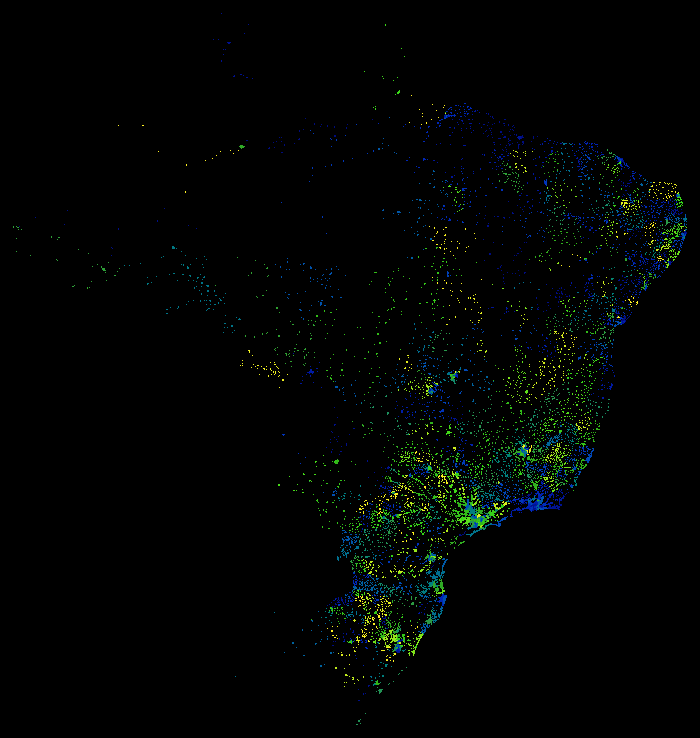

In [58]:
create_map(score, bgy, ds.mean(agg_name), 'avg_review_score_brazil')

Let's look at the average review score in Rio de Janeiro? Do you see any relationship with average delivery time?

In [59]:
rj_score = riodejaneiro.join(gp)
rj_score[agg_name] = rj_score['review_score']

In [60]:
plot_map(rj_score, 'Orders Average Review Score in Rio de Janeiro', ds.mean(agg_name), agg_name, cmap=bgy)

BokehModel(combine_events=True, render_bundle={'docs_json': {'fdb8122a-6e60-4b7d-a750-ae339b8ffd83': {'version…

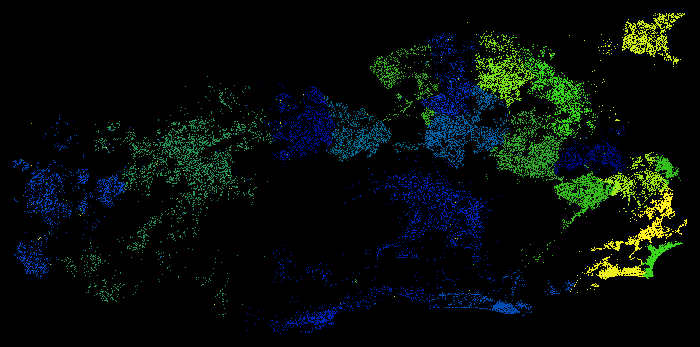

In [61]:
create_map(rj_score, bgy, ds.mean(agg_name), 'rio_de_janeiro_score')

## 2.6. Delayed Orders


Lets measure the percentage of delayed orders and see how that relate to the score given by customers?

In [62]:
orders['is_delayed'] = orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date'] 
gp = orders.groupby('customer_zip_code_prefix_3_digits').agg({'is_delayed': ['sum', 'count']})
agg_name = 'delayed'
gp[agg_name] = gp['is_delayed']['sum'] / gp['is_delayed']['count']
gp = gp[agg_name]
order_delay = brazil_geo.join(gp)

In [63]:
plot_map(order_delay, 'Orders Delay Percentage in Brazil', ds.mean(agg_name), agg_name, cmap=bgy)

BokehModel(combine_events=True, render_bundle={'docs_json': {'bc2f7ed4-b66a-423a-98d4-96e0bab32073': {'version…

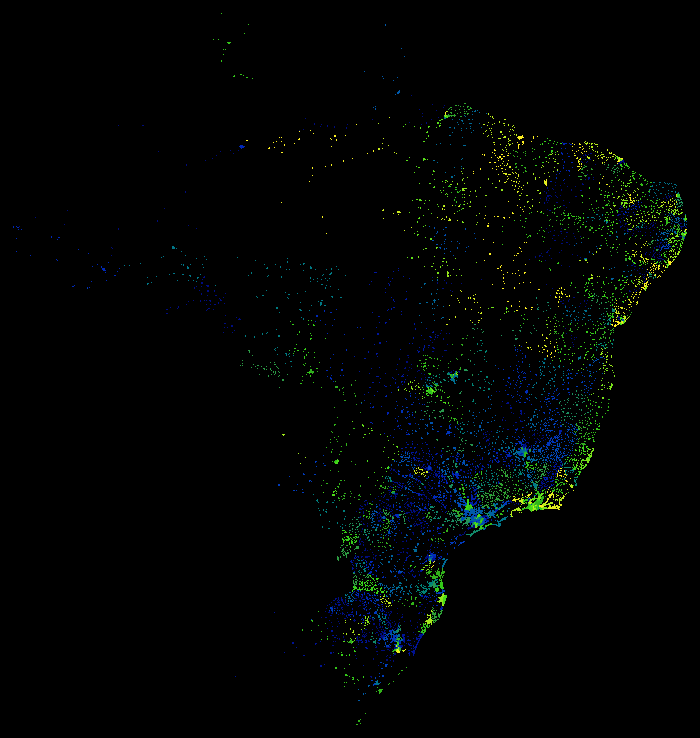

In [64]:
create_map(order_delay, bgy, ds.mean(agg_name), 'brazil_order_delay_percentage')

Looking again to Rio de Janeiro to view where order deliveries are more prone to be delayed.